# <font color="darkred">CS50 FINAL PROJECT - Jordan  Núñez (Cajamarca, Perú)</font>

# "Dynamic Programming for the Aggregate Planning Problem with Python"

#### Aggregate Planning: <br> 
Aggregate Planning is a famous optimization problem in Supply Chain Management / Production Management.

Basically, it's the planning and scheduling for production (or buying ) operations, for a particular product or item. <br>
The objective is to satisfy all demands in the most efficient manner (i.e. build an optimal production or buying plan that minimizes costs and therefore increases utilities).

#### Dynamic Programming: <br>
Dynamic programming, like the divide-and-conquer method, solves problems by combining the solutions to subproblems. (“Programming” in this context refers to a tabular method, not to writing computer code.) (Cormen, 2009)

## 1. Data

D = Demand <br> 
S = Setup / Order Cost <br>
c = Unit Production Cost / Unit Price Cost <br>
h = Unit Inventory Holding Cost <br>

#### [Dataset 1] Online Course: Operations and Supply Chain Management (NPTEL)
Link: https://www.youtube.com/watch?v=f52PKbigQx4

In [ ]:
D = [0, 80, 60, 40, 70]
S = [0, 60, 40, 60, 45]
c = [0, 5, 4, 5, 5]
h = [0, 2, 2, 1, 2]

#### [Dataset 2] Paper: Dynamic Version of the Economic Lot Size Model - Harvey M. Wagner & Thomson M. Whitin (1958)  <br>
Link: https://www.jstor.org/stable/2626974 

In [ ]:
D = [0, 69, 29, 36, 61, 61, 26, 34, 67, 45, 67, 79, 56]
S = [0, 85, 102, 102, 101, 98, 114, 105, 86, 119, 110, 98, 114]
c = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
h = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#### [Dataset 3] Scalability demonstration: 

In [ ]:
D = [0, 702, 733, 987, 709, 656, 788, 664, 969, 844, 696, 832, 784, 868, 781, 606, 975, 823, 851, 632, 624]
S = [0, 380, 200, 309, 279, 380, 307, 361, 432, 291, 315, 299, 302, 237, 239, 353, 396, 393, 213, 217, 389]
c = [0, 13, 18, 10, 11, 10, 12, 15, 16, 17, 13, 14, 10, 17, 11, 18, 14, 16, 13, 18, 19]
h = [0, 0.9, 0.9, 0.7, 0.6, 0.7, 0.4, 0.2, 0.5, 0.8, 0.6, 0.9, 0.4, 0.8, 0.8, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3]

## 2. Data input

In [3]:
D = [0, 702, 733, 987, 709, 656, 788, 664, 969, 844, 696, 832, 784, 868, 781, 606, 975, 823, 851, 632, 624]
S = [0, 380, 200, 309, 279, 380, 307, 361, 432, 291, 315, 299, 302, 237, 239, 353, 396, 393, 213, 217, 389]
c = [0, 13, 18, 10, 11, 10, 12, 15, 16, 17, 13, 14, 10, 17, 11, 18, 14, 16, 13, 18, 19]
h = [0, 0.9, 0.9, 0.7, 0.6, 0.7, 0.4, 0.2, 0.5, 0.8, 0.6, 0.9, 0.4, 0.8, 0.8, 0.2, 0.3, 0.4, 0.1, 0.2, 0.3]

## 3. Main Program

Period: 20
Dynamic Programming Solution
[0, [1], [1, 2], [3], [3, 4], [5], [5, 6], [5, 6, 7], [5, 6, 7, 8], [5, 6, 7, 8, 9], [5, 6, 7, 8, 9, 10], [5, 6, 7, 8, 9, 10, 11], [12], [12, 13], [12, 13, 14], [14, 15], [14, 15, 16], [14, 15, 16, 17], [14, 15, 16, 17, 18], [14, 15, 16, 17, 18, 19], [14, 15, 16, 17, 18, 19, 20]]

Minimum Cost = 182845.1
Option = 14
Optimal plan: [[1, 2], [3, 4], [5, 6, 7, 8, 9, 10, 11], [12, 13], [14, 15, 16, 17, 18, 19, 20]]
Period 1: 1 2 
Period 3: 3 4 
Period 5: 5 6 7 8 9 10 11 
Period 12: 12 13 
Period 14: 14 15 16 17 18 19 20 

Plans
Plan 1 = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
Plan 2 = [[1], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
Plan 3 = [[1, 2], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
Plan 4 = [[1, 2], [3], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
Plan 5 = [[1, 2], [3, 4], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
Plan

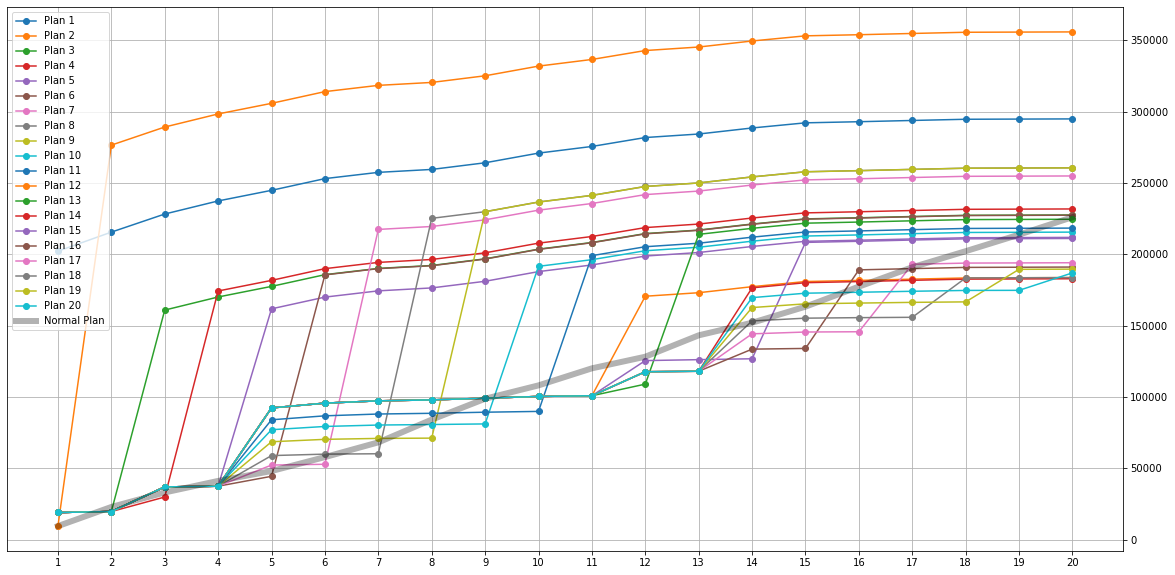

In [4]:
# Modules and Libraries
from sys import maxsize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# CALCULATE THE MINIMUM COST AND OPTIMAL PLAN
def aggdp(period):
    
    # Mimimum Cost array
    mincost = [0]
    
    # Optimal Plans array
    sol = [0]

    if period == 0:
        return mincost[n]
    else:
        # For each period i...
        for i in range(1, period + 1):
            optcost = maxsize

            # ...we've got the options j = 1 to j = i
            for j in range(1, i + 1):

                # Quantity for option j
                Q = 0
                for k in range(j, i + 1):
                    Q += D[k]

                # Inventory Holding Cost for option j
                H = 0
                for l in range(j + 1, i + 1):
                    for m in range(l, i + 1):
                        H += D[m]*h[l - 1]

                # If, so far, the plan is optimal(minimum cost)...
                if (S[j] + Q*c[j] + H + mincost[j - 1] < optcost):

                    # ...set it as a temporal optimal cost...
                    optcost = round(S[j] + Q*c[j] + H + mincost[j - 1], 2)

                    # ...and register the periods for which we have to produce/order
                    subsol = []
                    for n in range(j, i + 1):
                        subsol.append(n)
                        
                    # Register the option to which this cost belongs to
                    option = j

            # Append the minimum cost and the best plan to their respective arrays
            mincost.append(optcost)
            sol.append(subsol)

    return mincost, sol, option


# PRINT THE MINIMUM COST AND OPTIMAL PLAN + BUILD ARRAYS FOR OTHER PLANS
def aggdpsol(period):

    mincost, sol, option = aggdp(period)
    print("Dynamic Programming Solution")
    print(sol)
    print("")

    # Print minimum cost and option
    print(f"Minimum Cost = {mincost[period]}")
    print(f"Option = {option}")

    # Build and print the optimal plan array
    n = period
    plan = []
    while n > 0:
        plan.append(sol[n])
        n = sol[n][0] - 1
    plan.reverse()
    print(f"Optimal plan: {plan}")

    # Explicitly print the optimal plan
    for i in plan:
        print(f"Period {i[0]}: ", end="")
        for j in i:
            print(j, end=" ")
        print('')
    print("")

    # Other plans (options)
    plans = []
    
    # Build every other plan (option)
    for i in range(len(sol) - 1): 
        j = i # Extra variable that stores i, to manipulate it below
        plan = []
        while j > 0:
            plan.append(sol[j])
            j = sol[j][0] - 1
        plan.reverse()
        
        plan_rightside = []
        for k in range(i + 1, len(sol)):
            plan_rightside.append(k)
        plan.append(plan_rightside)
        plans.append(plan)
    
    return(plans)



# BUILD PRODUCTION/ORDER PROCEDURE AND COST TABLES FOR SUBOPTIMAL PLANS
def aggdptables(period):
    
    plans = aggdpsol(period)
    
    # Print all the plans
    print("Plans")
    for i in range(len(plans)):
        print(f"Plan {i + 1} = {plans[i]}")
    print("")
        
    # Table 1 of size = period * period, initialized with zeros
    table1 = []
    for i in range(period):
        row = []
        for j in range(period):
            row.append([0])
        table1.append(row)

    # Table 1: 1st modification
    # For every value [i][j] in Table 1
    for i in range(len(table1)):
        for j in range(len(table1)):
            
            # Place every start of production for all plans
            for k in plans[i]:
                if j + 1 == k[0]:
                    table1[i][j] = k

    #print("Table 1 - Periods with Production/Buy Order")
    #for i in table1:
        #print(i)
    #print("")

    # Table 2 of size = period * period, initialized with zeros
    table2 = []
    for i in range(period):
        row = []
        for j in range(period):
            row.append([0])
        table2.append(row)
    
    # Table 2 - 1st modification
    # For every value [i][j] in Table 1
    for i in range(len(table1)):
        for j in range(len(table1)):
            
            # If there's production/buy order in table1[i][j]
            if table1[i][j][0] != 0:
                 
                # Set table2[i][j] to the binary value 1
                table2[i][j] = [1]

    #print("Table 2 - Production binary values")
    #for i in table2:
        #print(i)
    #print("")
                
    # Table 1 - 2nd modification
    for i in range(len(table1)):
        for j in range(len(table1)):

            # Determine the periods that carry inventory and...
            if table1[i][j][0] == 0:
                carried_inv = []
                
                # ...add them to table 1
                for k in range(1, len(table1[i][j - 1])):
                    carried_inv.append(table1[i][j - 1][k])    
                table1[i][j] = carried_inv

    #print("Table 1 - Adding periods that carried inventory)
    #for i in table1:
        #print(i)
    #print("")
    
    # Table 3 - Costs for each period
    table3 = []
    for i in range(period):
        row = []
        for j in range(period):
            row.append(0)
        table3.append(row)
            
    # Table 3 - 1st modification
    for i in range(len(table3)):
        for j in range(len(table3)):
            
            # Accordingly with the binary values of table2, determine:
            if table2[i][j][0] == 1:
                
                # Setup/Order cost
                prodcost = S[j + 1]
                
                # Unit production/buy cost
                for k in table1[i][j]:
                    prodcost += D[k] * c[j + 1]
                    
                table3[i][j] = round(prodcost, 2)
            
            # Inventory costs
            else:
                
                invcost = 0
                for k in table1[i][j]:
                    invcost += D[k] * h[j]
                    
                table3[i][j] = round(invcost, 2)

    # Print Table 3
    print("Table 3 - Costs by period for every plan")
    for i in table3:
        print(i)
    print("")
    
    # Table 4 - Cummulated Costs
    table4 = []
    for i in range(period):
        row = []
        for j in range(period):
            row.append(0)
        table4.append(row)

    # Table 4 - 1st modification
    for i in range(period):
        for j in range(period):
            if j == 0:
                table4[i][j] = round(table3[i][j], 2)
            else:
                table4[i][j] = round(table3[i][j] + table4[i][j-1], 2)

    return table4



# PLOT ALL THE OPTIONS: PLAN AND COST
def aggdpgraph(period):
    table4 = aggdptables(period)
    
    # Print Table 4
    print("Table 4 - Cummulated costs for every plan")
    for i in table4:
        print(i)
    print("")
    
    # X Axis for the graph
    x_axis = []
    for i in range(period):
        x_axis.append(i+1)
    
    # Normal Plan Costs and Cummulated Costs
    normalplan = []
    for i in range(period):
        normalplan.append(S[i + 1] + c[i + 1]*D[i + 1])
    print("Normal Plan - Costs by period")
    print(normalplan)
    for i in range(period):
        if i != 0:
            normalplan[i] = normalplan[i] + normalplan[i - 1]    
    print("Normal Plan - Cummulated costs")
    print(normalplan)
        
    # Plotting
    plt.rcParams['figure.figsize'] = [20, 10]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.yaxis.tick_right()
    #ax.xaxis.tick_top()
    for i in range(period):
        plt.plot(x_axis, table4[i], marker="o", alpha=1, label=f"Plan {i + 1}")
    plt.plot(x_axis, normalplan, linestyle="-", color="black", linewidth=6, alpha=0.3, label="Normal Plan")
    plt.legend()
    plt.xticks(range(1,period + 1))
    plt.grid()
    plt.show  

# ASK THE USER FOR A PERIOD AND EXECUTE THE CODE:
period = int(input("Period: "))
aggdpgraph(period)